<a href="https://colab.research.google.com/github/Mikcl/PNN-CW/blob/main/PNN_CW_WK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 128)      

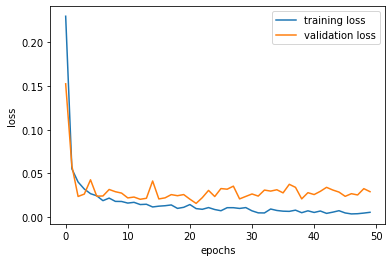

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from keras.initializers import HeUniform
import matplotlib.pyplot as plt

# Using a CNN - A variation of https://arxiv.org/abs/1608.06037 - Simple Net. 

BATCH_SIZE = 256
EPOCHS = 50

(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


INPUT_SHAPE=(28,28,1)
MOMENTUM = 0.95
DROP_OUT=0.2
filters = [64,128,128,128]
NUM_CLASSES=10

PADDING = 'same'
KERNEL = HeUniform()

RELU = 'relu'

net = Sequential()

KERNEL_SIZE = 3


for i, dim in enumerate(filters):
    if i == 0:
        net.add(Conv2D(filters=dim, kernel_size=KERNEL_SIZE, kernel_initializer=KERNEL, padding=PADDING,input_shape=INPUT_SHAPE))
        net.add(BatchNormalization(axis=-1, momentum=MOMENTUM)) 
        net.add(Activation(RELU))
        net.add(Dropout(DROP_OUT))
    else:
        net.add(Conv2D(filters=dim, kernel_size=KERNEL_SIZE, padding=PADDING, kernel_initializer=KERNEL))
        net.add(BatchNormalization(axis=-1, momentum=MOMENTUM)) 
        net.add(Activation(RELU))
        net.add(Dropout(DROP_OUT))

        net.add(Conv2D(filters=dim, kernel_size=KERNEL_SIZE, padding=PADDING, kernel_initializer=KERNEL))
        net.add(BatchNormalization(axis=-1, momentum=MOMENTUM)) 
        net.add(Activation(RELU))
        net.add(Dropout(DROP_OUT))

        net.add(Conv2D(filters=dim, kernel_size=KERNEL_SIZE, padding=PADDING, kernel_initializer=KERNEL))
        net.add(BatchNormalization(axis=-1, momentum=MOMENTUM)) 
        net.add(Activation(RELU))

        net.add(MaxPooling2D(pool_size=2,strides=2))
        
# layer 11
net.add(Conv2D(filters=filters[-1], kernel_size=1, padding=PADDING, kernel_initializer=KERNEL))
net.add(BatchNormalization(axis=-1, momentum=MOMENTUM)) 
net.add(Activation(RELU))
# layer 12- skipped 
# layer 13

net.add(Conv2D(filters=filters[-1],kernel_size=KERNEL_SIZE,padding=PADDING, kernel_initializer=KERNEL))
net.add(Flatten())
net.add(Dense(NUM_CLASSES, activation='softmax'))

print(net.summary())

net.compile(loss='categorical_crossentropy', optimizer='adam')
history = net.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=EPOCHS,batch_size=BATCH_SIZE)

plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()




In [ ]:
net.save("network_for_mnist.h5")

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import time 

Y_test = y_test
X_test = x_test

model=load_model("network_for_mnist.h5")

test_scores = model.evaluate(X_test, Y_test, verbose=1, batch_size=32)
print('Test loss:', test_scores)

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
label = np.argmax(Y_test,axis=1)

report = classification_report(label,pred)

misclassified=sum(pred!=label)
print('Percentage misclassified = ',100*misclassified/labels_test.size)

timestr = time.strftime("%Y%m%d-%H%M%S")
f = open(f'report-{timestr}.txt', 'w')
f.write(f'Classification Report\n\n{report}\n\n')
f.close()

313/313 [==============================] - 2s 7ms/step - loss: 0.0291
Test loss: 0.029108157381415367
Percentage misclassified =  0.56
